## 1. Import Necessary Libraries
We start by importing the required libraries for data manipulation, visualization, and machine learning.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Setup plotting style
sns.set(style="whitegrid")
%matplotlib inline

## 2. Load the Dataset
Load the IMDB dataset from the CSV file and display basic information to understand its structure.

In [46]:
# Load the dataset
df = pd.read_csv('dataset/IMDB Dataset.csv')

# Display first few rows
print(df.head())

# Display dataset info
print(df.info())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


## 3. Data Visualization
Visualize the distribution of the sentiments to check for class balance.

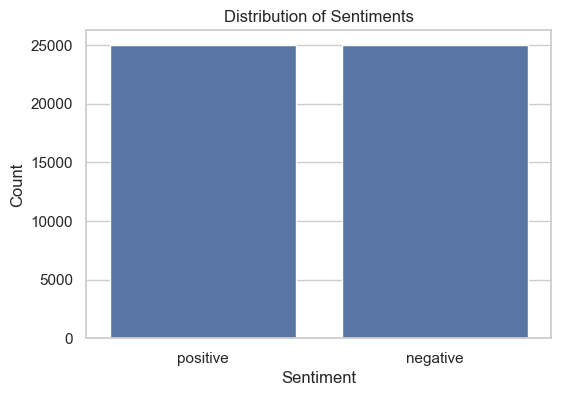

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [47]:
# Visualize the distribution of sentiment
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Print the value counts
print(df['sentiment'].value_counts())

## 4. Data Preprocessing
Clean the text data by identifying and removing HTML tags, non-alphabetic characters, and converting text to lowercase.

In [48]:
# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove non-alphabetic characters (preserving spaces)
    text = re.sub('[^a-zA-Z\s]', '', text)
    return text

# Apply cleaning
print("Cleaning reviews...")
df['cleaned_review'] = df['review'].apply(clean_text)

print("First 5 cleaned reviews:")
print(df['cleaned_review'].head())

Cleaning reviews...
First 5 cleaned reviews:
0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: cleaned_review, dtype: object


## 5. Feature Extraction (TF-IDF)
Convert the cleaned text reviews into numerical vectors using TF-IDF (Term Frequency-Inverse Document Frequency).

In [49]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform
print("Vectorizing text...")
X = tfidf.fit_transform(df['cleaned_review'])
y = df['sentiment']

print("Shape of X:", X.shape)

Vectorizing text...
Shape of X: (50000, 5000)


## 6. Train-Test Split
Split the dataset into training and testing sets to evaluate the performance of our models.

In [50]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (40000, 5000)
Testing set shape: (10000, 5000)


## 7. Model Training: Multinomial Naive Bayes
Train a Multinomial Naive Bayes classifier on the training data.

In [51]:
# Train Multinomial Naive Bayes
nb_model = MultinomialNB()
print("Training Multinomial Naive Bayes...")
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)

Training Multinomial Naive Bayes...


## 8. Model Training: Logistic Regression
Train a Logistic Regression classifier on the training data.

In [52]:
# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
print("Training Logistic Regression...")
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

Training Logistic Regression...


## 9. Model Evaluation Function
Define a helper function to calculate and print evaluation metrics (Accuracy, Precision, Recall, F1-Score) and plot the confusion matrix.

In [53]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} Evaluation ---")
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label='positive')
    recall = recall_score(y_true, y_pred, pos_label='positive')
    f1 = f1_score(y_true, y_pred, pos_label='positive')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    return accuracy

## 10. Evaluate Models
Apply the evaluation function to both the Naive Bayes and Logistic Regression models.

--- Multinomial Naive Bayes Evaluation ---
Accuracy: 0.8486
Precision: 0.8514
Recall: 0.8474
F1 Score: 0.8494

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



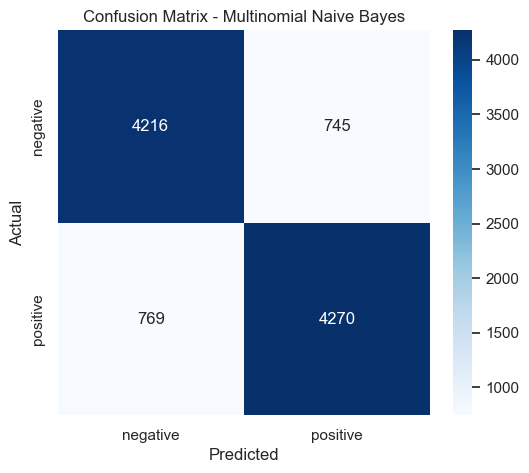

--- Logistic Regression Evaluation ---
Accuracy: 0.8936
Precision: 0.8855
Recall: 0.9059
F1 Score: 0.8956

Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



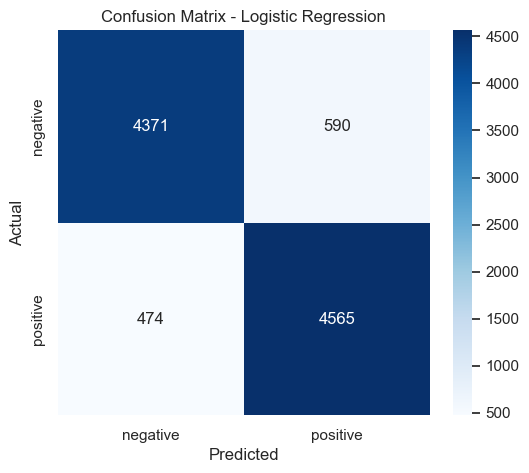

In [54]:
# Evaluate Naive Bayes
acc_nb = evaluate_model(y_test, y_pred_nb, "Multinomial Naive Bayes")

# Evaluate Logistic Regression
acc_lr = evaluate_model(y_test, y_pred_lr, "Logistic Regression")

## 11. Model Comparison
Compare the accuracy of the two models using a bar chart.

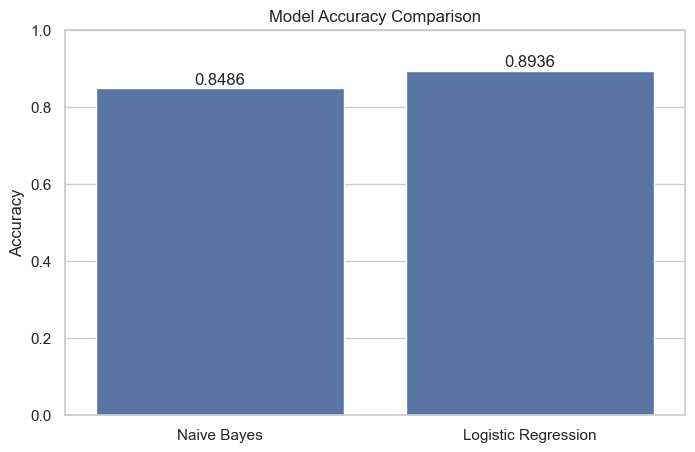

In [55]:
# Compare Accuracies
models = ['Naive Bayes', 'Logistic Regression']
accuracies = [acc_nb, acc_lr]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.0)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.ylabel('Accuracy')
plt.show()